## Shark Attacks - Further Exploration

### JBI100 Visualisation: 2024-2025

Data source: 
- Australian Shark Incidents (https://github.com/cjabradshaw/AustralianSharkIncidentDatabase)

This notebook explores the data further to see the months and seasons the shark attacks occur, the site of the attack, the state in which the attack occured, and more specifically, the exact location it occurred (in terms of longitude and latitude). There is still another weather data set to be added, so we can see if there is a correlation between weather and the attacks.

In [2]:
# Import libraries
import pandas as pd
import calendar
import cartopy.crs as ccrs
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Do not truncate tables
pd.set_option('display.max_columns', None)

# If you receive a 'ModuleNotFoundError' please install the according library. 
# This can be done from within the Jupyter environment with the command 
#'!python3 -m pip install lib' where lib is the according library name.

In [3]:
# Load the data

# Australian Shark Incidents Data
df_shark = pd.read_excel('Australian Shark-Incident Database Public Version.xlsx', index_col=0)

In [4]:
df_shark.head(5)

,Incident.month,Incident.year,Victim.injury,State,Location,Latitude,Longitude,Site.category,Site.category.comment,Shark.common.name,Shark.scientific.name,Shark.identification.method,Shark.identification.source,Shark.length.m,Basis.for.length,Provoked/unprovoked,Provocative.act,No.sharks,Victim.activity,Fish.speared?,Commercial.dive.activity,Object.of.bite,Present.at.time.of.bite,Direction.first.strike,Shark.behaviour,Victim.aware.of.shark,Shark.captured,Injury.location,Injury.severity,Victim.gender,Victim.age,Victim.clothing,Clothing.coverage,Dominant.clothing.colour,Other.clothing.colour,Clothing.pattern,Fin.colour,Diversionary.action.taken,Diversionary.action.outcome,People <3m,People 3-15m,Time.of.incident,Depth.of.incident.m,Teeth.recovered,Time.in.water.min,Water.temperature.°C,Total.water.depth.m,Water.visability.m,Distance.to.shore.m,Spring.or.neap.tide,Tidal.cycle,Wind.condition,Weather.condition,Air.temperature.°C,Personal.protective.device,Deterrent.brand.and.type,Data.source,Reference,Unnamed: 59
UIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1791,fatal,NSW,near sydney,-33.866667,151.2,coastal,NaN,white shark,Carcharodon carcharias,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,NaN,swimming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,torso,major lacerations,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"shark&survl, whitley 1958, book ref 1793",NaN
2,3,1803,injured,WA,"hamelin bay, faure island",-25.833333,113.883333,coastal,NaN,tiger shark,Galeocerdo cuvier,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,swam at victim,Y,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pushed at shark,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,book,"balgridge,green,taylor,whitley 1940",NaN
3,1,1807,injured,NSW,"cockle bay, sydney harbour",-33.866667,151.2,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit victim on wrist,NaN,NaN,"arm, hand",minor lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,sydney gazette 18.1.1807,NaN
4,1,1820,fatal,TAS,"sweetwater point, pitt water",-42.8,147.533333,coastal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,provoked,NaN,1.0,swimming,NaN,NaN,NaN,catch,NaN,bit victim on leg,N,NaN,leg,major lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,witness account,"shark&survl, c. black researcher",NaN
5,1,1825,injured,NSW,"kirribili point, sydney harbour",-33.85,151.216667,estuary/harbour,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,NaN,NaN,bit legs,NaN,NaN,leg,minor lacerations,male,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,maitland daily mercury 13.11.1899,NaN


In [5]:
df_shark.shape

(1233, 59)

In [6]:
df_shark.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1233 entries, 1 to 1233
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Incident.month               1233 non-null   int64  
 1   Incident.year                1233 non-null   int64  
 2   Victim.injury                1233 non-null   object 
 3   State                        1233 non-null   object 
 4   Location                     1230 non-null   object 
 5   Latitude                     1233 non-null   object 
 6   Longitude                    1233 non-null   object 
 7   Site.category                1233 non-null   object 
 8   Site.category.comment        48 non-null     object 
 9   Shark.common.name            1176 non-null   object 
 10  Shark.scientific.name        1167 non-null   object 
 11  Shark.identification.method  1004 non-null   object 
 12  Shark.identification.source  148 non-null    object 
 13  Shark.length.m         

In [7]:
df_month = df_shark.loc[:, ['Incident.month']]
df_month.sample(5)

,Incident.month
UIN,
927,1
125,1
16,3
486,11
242,3


Text(0.5, 0, 'Incident month')

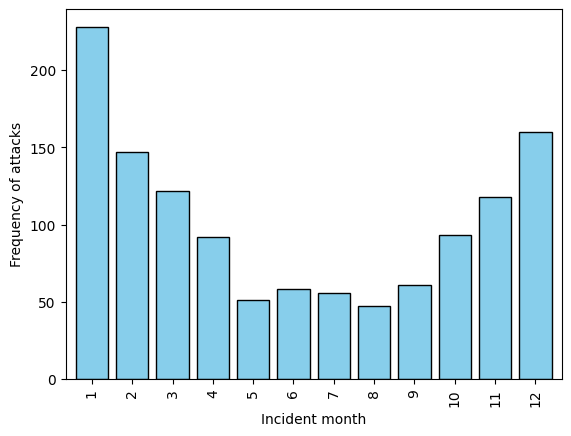

In [8]:
month_counts = df_month['Incident.month'].value_counts().sort_index()
month_plot = month_counts.plot(kind='bar', width=0.8, color='skyblue', edgecolor='black')
month_plot.set_ylabel("Frequency of attacks")
month_plot.set_xlabel("Incident month")

In [9]:
# Converted months from numbers to their respective names using a dictionary

month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 
              7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df_month['Incident.month'] = df_month['Incident.month'].map(month_dict)

df_month

,Incident.month
UIN,
1,January
2,March
3,January
4,January
5,January
...,...
1229,December
1230,January
1231,January


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

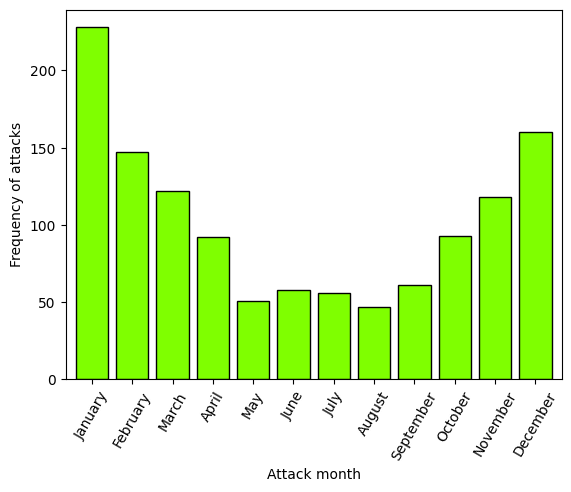

In [10]:
month_order = [
    "January", "February", "March", "April", "May", "June", 
    "July", "August", "September", "October", "November", "December"
]

# Convert 'Incident.month' column to a categorical type with the specified order
df_month['Incident.month'] = pd.Categorical(df_month['Incident.month'], categories=month_order, ordered=True)

month_counts = df_month['Incident.month'].value_counts().sort_index()

month_plot = month_counts.plot(kind='bar', width=0.8, color='chartreuse', edgecolor='black')

month_plot.set_ylabel('Frequency of attacks')
month_plot.set_xlabel('Attack month')
plt.xticks(rotation=60)

### Month plot comment

At first it may seem odd that the highest numbers of attacks are between November to February. However, it is important to remember that in Australia, the summer months are December, January and February. Now, we can move on to plotting the locations (longtitude and latitude).

In [11]:
df_specific_location = df_shark.loc[:, ['Latitude', 'Longitude']]
df_specific_location.sample(5)

,Latitude,Longitude
UIN,,
113,-35.133333,150.75
1063,-33.832501,121.99687
688,-33.85,151.233333
184,-41.05,145.75
687,-32.083333,132.966667


In [12]:
#df_location.plot(kind='scatter', x='Latitude', y='Longitude', color="b")

df_location = df_shark.loc[:, ['Location']]
df_location.sample(5)

,Location
UIN,
527,off coast of western aust
512,aldinga beach
171,port noarlunga
1197,"shelley beach, manly"
117,esperance


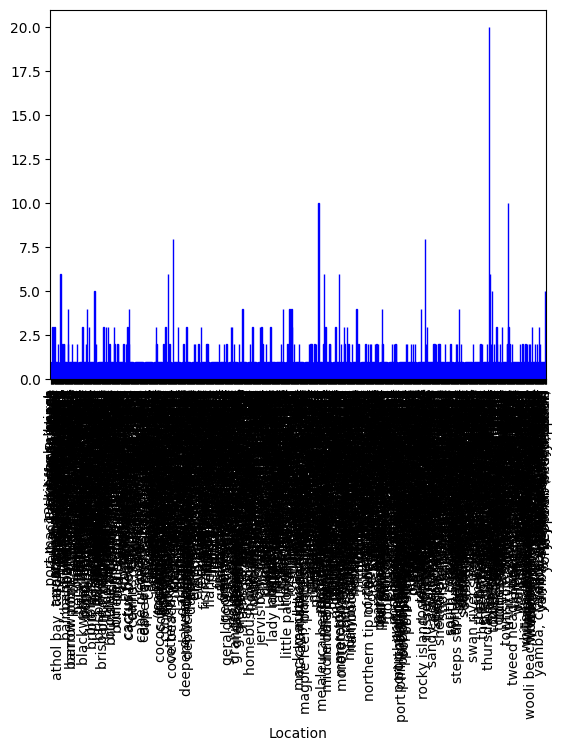

In [13]:

location_counts = df_location['Location'].value_counts().sort_index()
location_plot = location_counts.plot(kind='bar', width=0.8, color='skyblue', edgecolor='blue')

# Location plot comment

## As we can see, this is not at all readable. Will have to graph all the separate longitude and latitude points on a separate 'map' sort of plot.

We can try to plot the frequency of attacks against the state in which they occurred.

In [18]:
df_states = df_shark.loc[:, ['State']]
df_states.sample(5)

,State
UIN,
434,QLD
684,VIC
572,TAS
1148,TAS
230,WA


Text(0, 0.5, 'Frequency of attacks')

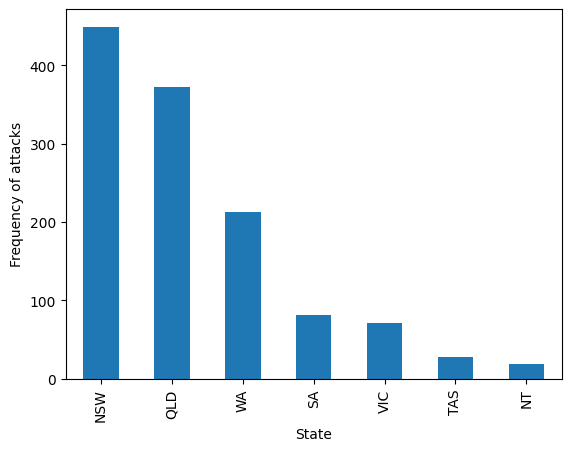

In [23]:
state_counts = df_states['State'].value_counts()
state_plot = state_counts.plot(kind='bar')
state_plot.set_ylabel('Frequency of attacks')

##### NSW is south-east of Australia, and has one edge towards the ocean. 

We can also plot the frequency of attacks against the injury type.

In [24]:
df_shark.sample(5)

,Incident.month,Incident.year,Victim.injury,State,Location,Latitude,Longitude,Site.category,Site.category.comment,Shark.common.name,Shark.scientific.name,Shark.identification.method,Shark.identification.source,Shark.length.m,Basis.for.length,Provoked/unprovoked,Provocative.act,No.sharks,Victim.activity,Fish.speared?,Commercial.dive.activity,Object.of.bite,Present.at.time.of.bite,Direction.first.strike,Shark.behaviour,Victim.aware.of.shark,Shark.captured,Injury.location,Injury.severity,Victim.gender,Victim.age,Victim.clothing,Clothing.coverage,Dominant.clothing.colour,Other.clothing.colour,Clothing.pattern,Fin.colour,Diversionary.action.taken,Diversionary.action.outcome,People <3m,People 3-15m,Time.of.incident,Depth.of.incident.m,Teeth.recovered,Time.in.water.min,Water.temperature.°C,Total.water.depth.m,Water.visability.m,Distance.to.shore.m,Spring.or.neap.tide,Tidal.cycle,Wind.condition,Weather.condition,Air.temperature.°C,Personal.protective.device,Deterrent.brand.and.type,Data.source,Reference,Unnamed: 59
UIN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
375,1,1939,uninjured,NSW,"yamba, clarence river",-29.416667,152.333333,river,NaN,bull shark,Carcharhinus leucas,"shark behaviour, geographical location",NaN,2.1,witness/victim,provoked,enticed shark,1.0,fishing,NaN,NaN,NaN,catch,in front,swam towards victim,N,NaN,other: uninjured,NaN,male,11.0,NaN,NaN,NaN,NaN,NaN,NaN,hit shark with prawn shoop,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,other: prawn scoop,NaN,media outlet,"shark&survl, whitely, smh 16.1.1939",NaN
109,1,1895,uninjured,QLD,brisbane river,-27.466667,153,river,NaN,bull shark,Carcharhinus leucas,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,1.0,unmotorised boating,NaN,NaN,Vessel,NaN,NaN,bit scull in 2 pieces,NaN,NaN,other: uninjured,NaN,male,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,smh 21.3.1930,NaN
308,12,1932,injured,NT,arnhem land (coastal area),-11.933333,132.616667,coastal,NaN,tiger shark,Galeocerdo cuvier,"bite analysis, shark behaviour, geographical l...",NaN,NaN,NaN,unprovoked,NaN,NaN,swimming,NaN,NaN,NaN,NaN,NaN,bit victim on leg,NaN,NaN,leg,major lacerations,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,sunday times (perth) 11.12.1932,NaN
34,12,1862,fatal,QLD,"brisbane river, brisbane",-27.366667,153.15,river,NaN,bull shark,Carcharhinus leucas,"shark behaviour, geographical location",NaN,NaN,NaN,unprovoked,NaN,1.0,swimming,NaN,NaN,NaN,other: shot bird,NaN,bit victim on torso,Y,NaN,other: body not recovered,NaN,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,1.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,media outlet,the courier brisbane 19.12.1862,NaN
1164,12,2020,injured,SA,"d'estrees bay, kangaroo island",-35.9295,137.5966,island open ocean,NaN,white shark,Carcharodon carcharias,NaN,NaN,NaN,NaN,unprovoked,NaN,1.0,boarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://www.news.com.au/technology/science/ani...,NaN


In [28]:
df_injury = df_shark.loc[:, ['Victim.injury']]
df_injury.sample(3)

,Victim.injury
UIN,
1076,injured
1023,injured
863,uninjured


Text(0.5, 0, 'Victim Injury Type')

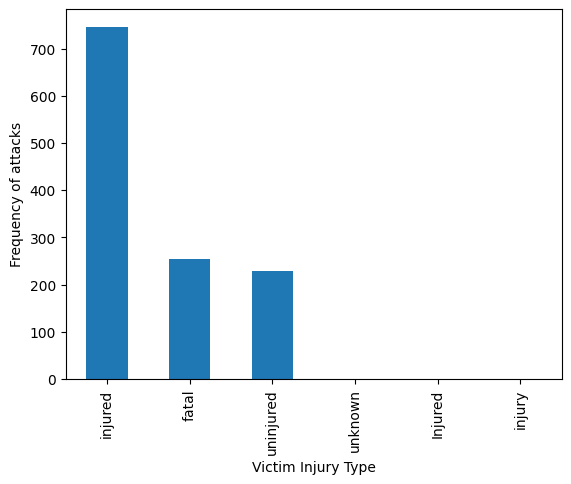

In [35]:
injury_counts = df_injury['Victim.injury'].value_counts()
injury_plot = injury_counts.plot(kind='bar')
injury_plot.set_ylabel('Frequency of attacks')
injury_plot.set_xlabel('Victim Injury Type')

In [39]:
injury_clean_mask1 = (df_injury['Victim.injury'] == 'injured')
injury_clean_mask2 = (df_injury['Victim.injury'] == 'fatal')
injury_clean_mask3 = (df_injury['Victim.injury'] == 'uninjured')

df_injury_clean = df_injury[injury_clean_mask1 | injury_clean_mask2 | injury_clean_mask3]
df_injury_clean

,Victim.injury
UIN,
1,fatal
2,injured
3,injured
4,fatal
5,injured
...,...
1229,fatal
1230,injured
1231,injured


Text(0.5, 0, 'Victim Injury Type')

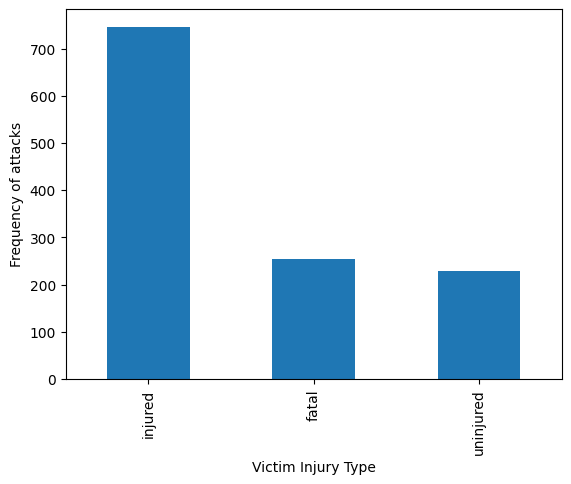

In [40]:
injury_counts = df_injury_clean['Victim.injury'].value_counts()
injury_plot = injury_counts.plot(kind='bar')
injury_plot.set_ylabel('Frequency of attacks')
injury_plot.set_xlabel('Victim Injury Type')